In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from windrose import WindroseAxes
import seaborn as sns 

### Load and Merge the datasets adding a Country Column

In [ ]:
def merge_country_datasets():
    #importing the cleaned country datasets
    df_benin = pd.read_csv('./data/cleaned/benin_cleaned.csv')
    df_sierraleone = pd.read_csv('./data/cleaned/sierraleone_cleaned.csv')
    df_togo = pd.read_csv('./data/cleaned/togo_cleaned.csv')
    
    # Adding a country column
    df_benin['country'] = 'benin'
    df_sierraleone['country'] = 'sierraleone'
    df_togo['country'] = 'togo'

    # merging all the country datasets
    df = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)
    return df
df = merge_country_datasets()
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,is_outlier,country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,False,benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,False,benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,False,benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,False,benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,False,benin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576795,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,False,togo
1576796,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,False,togo
1576797,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,False,togo
1576798,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,False,togo


## Time Series Analysis

### Trends throughout day

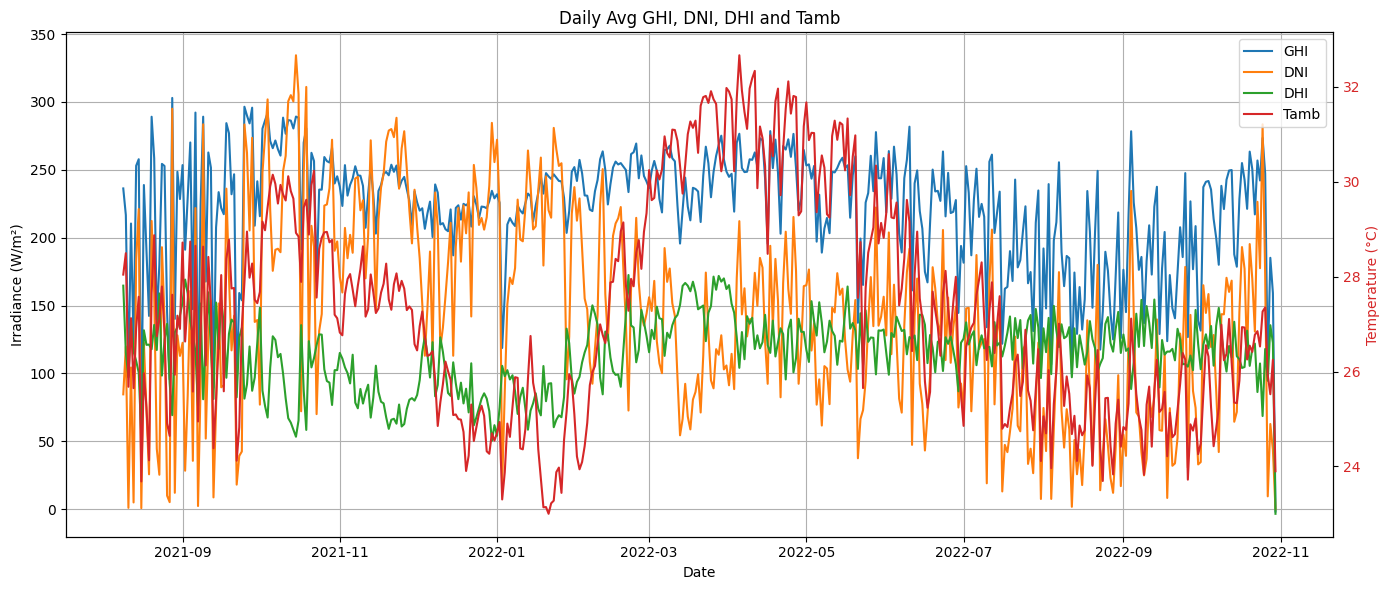

In [30]:
def plot_solar_data_resampled(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)

    # Resample daily
    daily_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean().dropna()

    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(daily_df.index, daily_df['GHI'], label='GHI', color='tab:blue')
    ax1.plot(daily_df.index, daily_df['DNI'], label='DNI', color='tab:orange')
    ax1.plot(daily_df.index, daily_df['DHI'], label='DHI', color='tab:green')
    ax1.set_ylabel('Irradiance (W/m²)')
    ax1.set_xlabel('Date')
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(daily_df.index, daily_df['Tamb'], label='Tamb', color='tab:red')
    ax2.set_ylabel('Temperature (°C)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2,labels1 + labels2, loc='upper right')

    plt.title('Daily Avg GHI, DNI, DHI and Tamb')
    plt.tight_layout()
    plt.show()
plot_solar_data_resampled(df)

### Patterns by months 

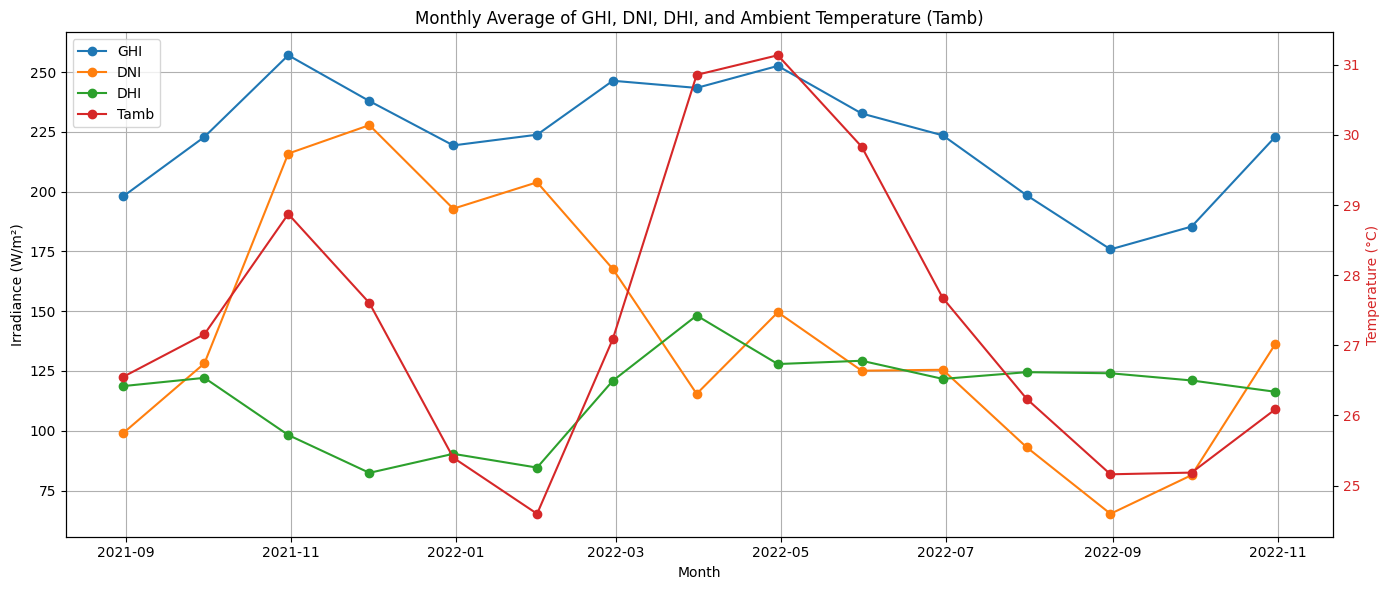

In [33]:
def plot_monthly_solar_data(df):
    # Resample to monthly averages
    monthly_df = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('ME').mean().dropna()

    # Plot
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(monthly_df.index, monthly_df['GHI'], label='GHI', color='tab:blue', marker='o')
    ax1.plot(monthly_df.index, monthly_df['DNI'], label='DNI', color='tab:orange', marker='o')
    ax1.plot(monthly_df.index, monthly_df['DHI'], label='DHI', color='tab:green', marker='o')
    ax1.set_ylabel('Irradiance (W/m²)')
    ax1.set_xlabel('Month')
    ax1.grid(True)

    # Secondary Y-axis for Tamb
    ax2 = ax1.twinx()
    ax2.plot(monthly_df.index, monthly_df['Tamb'], label='Tamb', color='tab:red', marker='o')
    ax2.set_ylabel('Temperature (°C)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Formatting
    plt.title('Monthly Average of GHI, DNI, DHI, and Ambient Temperature (Tamb)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_monthly_solar_data(df)

Correlation and Relationship Analysis

## Correlation Heatmap 

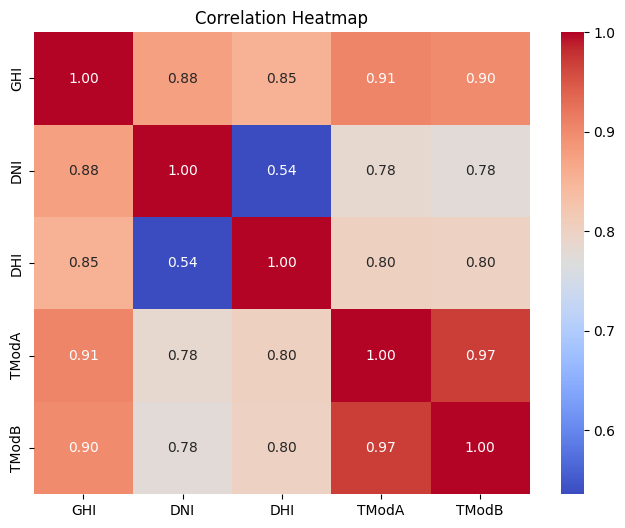

In [55]:
# Select relevant columns
def Heatmap():
    cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
    corr_matrix = df[cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
Heatmap()

### Scatter Plots 

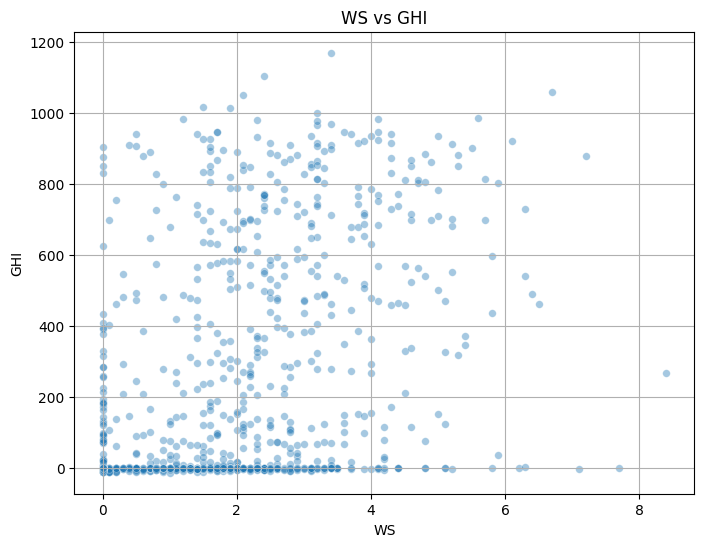

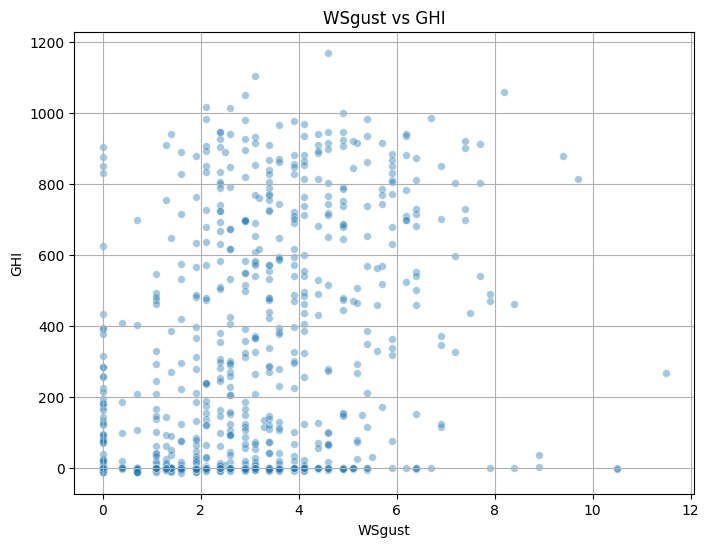

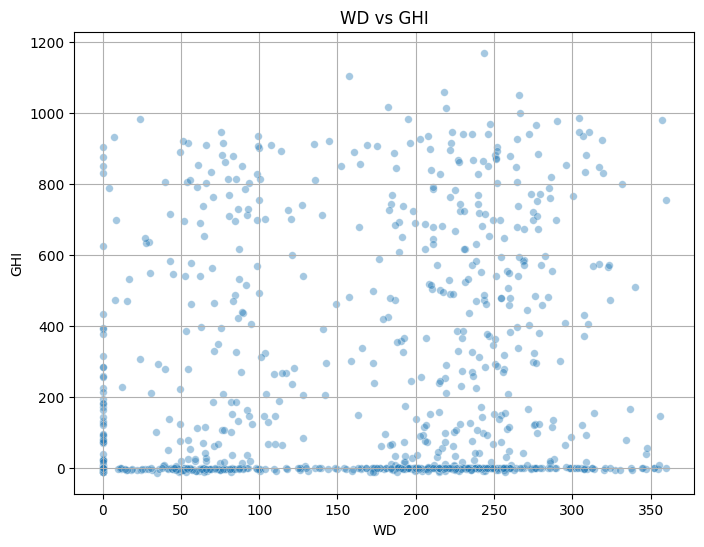

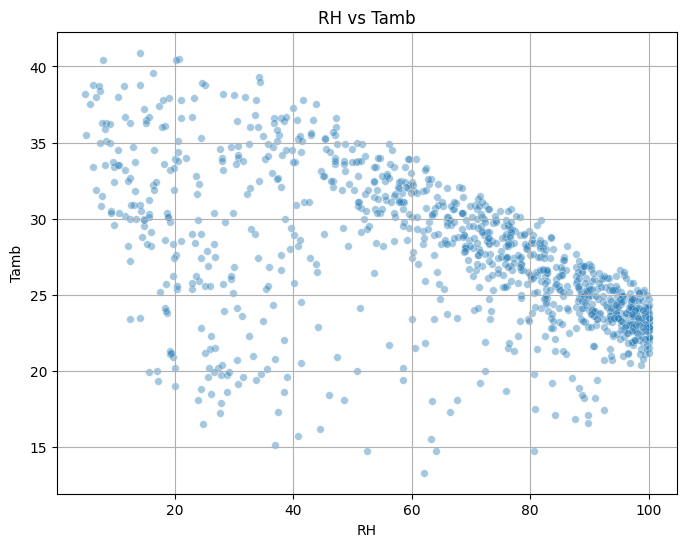

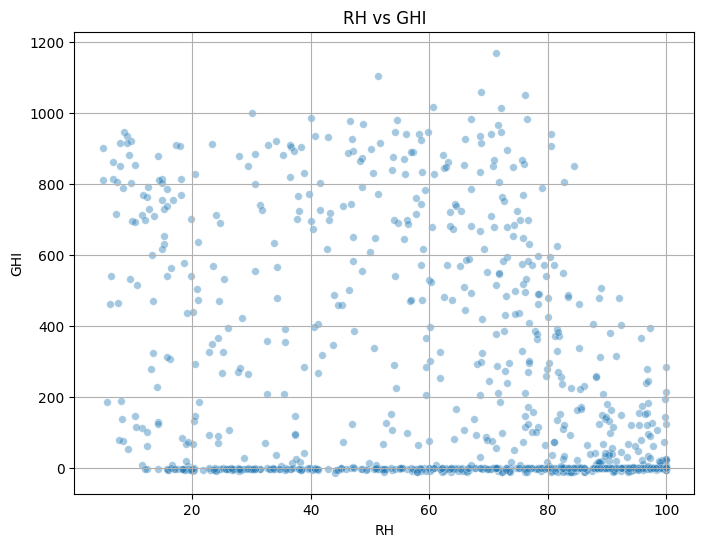

In [59]:
def Scatter_Plots():
    # Sample the dataset for clarity
    sample_df = df[['WS', 'WSgust', 'WD', 'GHI', 'RH', 'Tamb']].dropna().sample(1000, random_state=42)
    
    # WS vs GHI
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sample_df, x='WS', y='GHI', alpha=0.4, s=30)
    plt.title('WS vs GHI')
    plt.grid(True)
    plt.show()
    
    # WSgust vs GHI
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sample_df, x='WSgust', y='GHI', alpha=0.4, s=30)
    plt.title('WSgust vs GHI')
    plt.grid(True)
    plt.show()
    
    # WD vs GHI
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sample_df, x='WD', y='GHI', alpha=0.4, s=30)
    plt.title('WD vs GHI')
    plt.grid(True)
    plt.show()
    
    # RH vs Tamb
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sample_df, x='RH', y='Tamb', alpha=0.4, s=30)
    plt.title('RH vs Tamb')
    plt.grid(True)
    plt.show()
    
    # RH vs GHI
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sample_df, x='RH', y='GHI', alpha=0.4, s=30)
    plt.title('RH vs GHI')
    plt.grid(True)
    plt.show()
Scatter_Plots()

## Windrose of WS/WD.

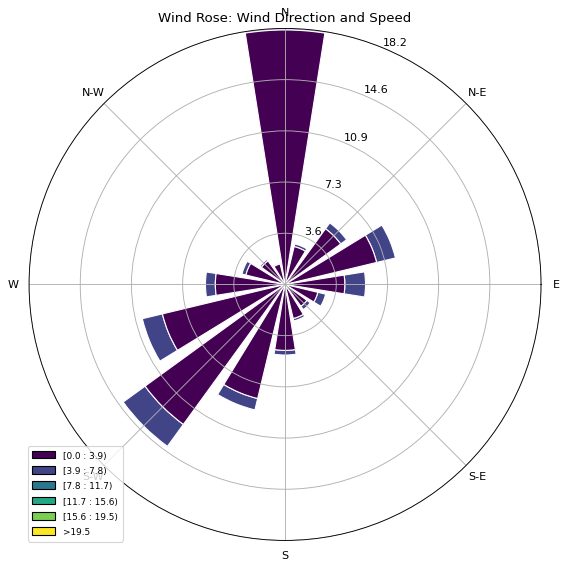

In [75]:
def Wind_rose():
    # Load and drop missing values
    df = pd.read_csv("Merged_data.csv")
    wind_data = df[['WS', 'WD']].dropna()
    
    # Create wind rose
    ax = WindroseAxes.from_ax()
    ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title('Wind Rose: Wind Direction and Speed')
    plt.show()
Wind_rose()    

## Histograms for GHI and WS

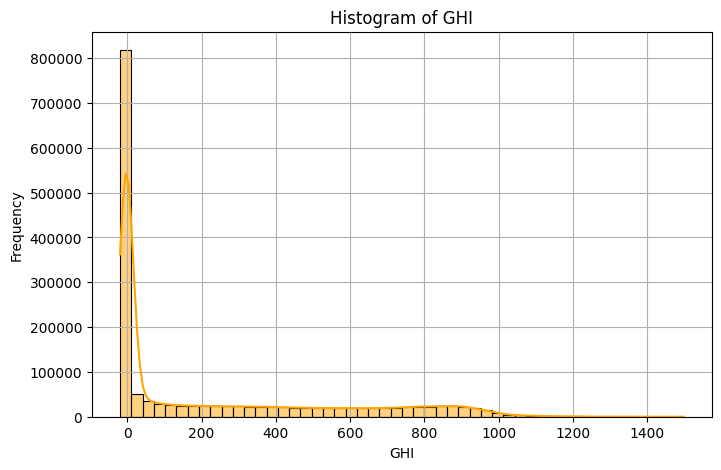

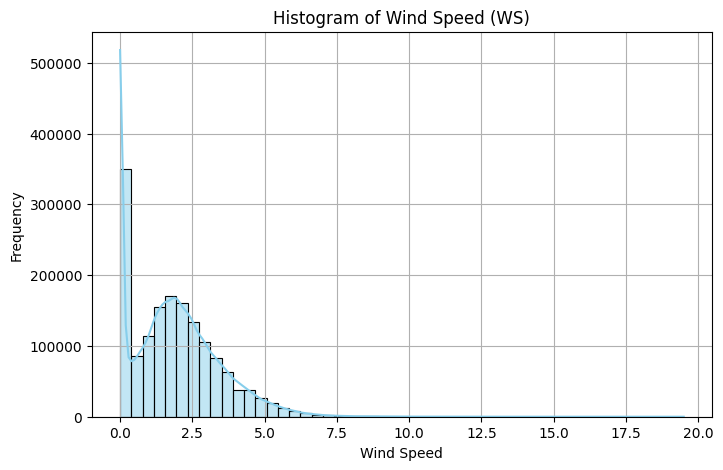

In [63]:
def Hist_GHI():
    # Drop missing values
    hist_data = df[['GHI', 'WS']].dropna()
    
    # GHI Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(hist_data['GHI'], bins=50, kde=True, color='orange')
    plt.title('Histogram of GHI')
    plt.xlabel('GHI')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # WS Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(hist_data['WS'], bins=50, kde=True, color='skyblue')
    plt.title('Histogram of Wind Speed (WS)')
    plt.xlabel('Wind Speed')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
Hist_GHI()

## Bubble Chart of GHI vs. Tamb with bubble size = RH or BP

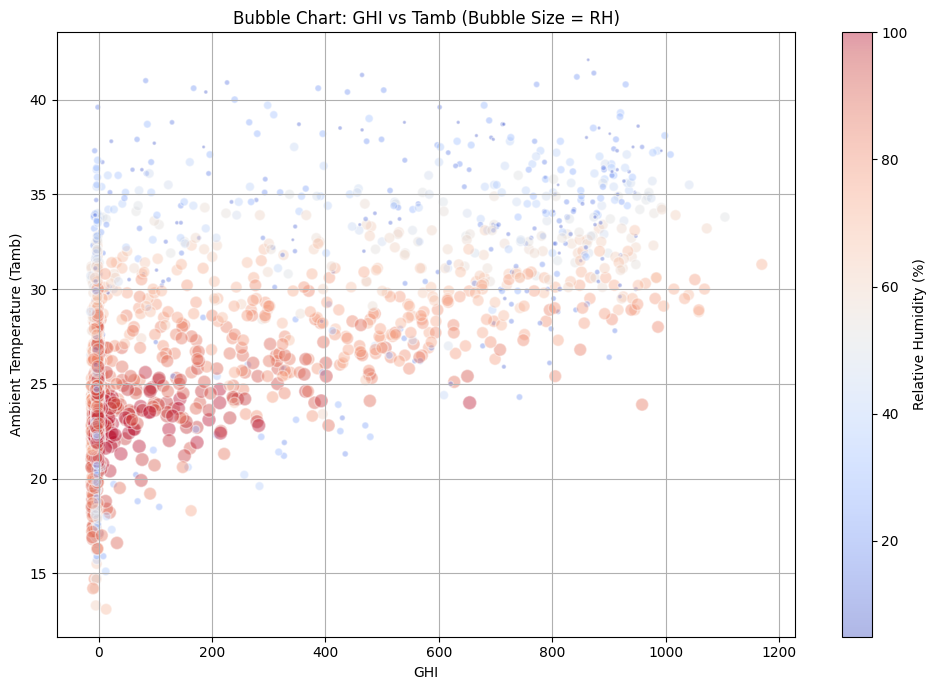

In [81]:
def Bubble_chart():
   
    # Load and clean
    bubble_df = df[['GHI', 'Tamb', 'RH']].dropna().sample(2000, random_state=42)  # sample for clarity
    
    # Plot
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(
        bubble_df['GHI'],
        bubble_df['Tamb'],
        s=bubble_df['RH'],  # Bubble size = RH
        alpha=0.4,
        c=bubble_df['RH'],  # Color mapped to RH too
        cmap='coolwarm',
        edgecolors='w'
    )
    
    plt.colorbar(label='Relative Humidity (%)')
    plt.xlabel("GHI")
    plt.ylabel("Ambient Temperature (Tamb)")
    plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
Bubble_chart()